<a href="https://colab.research.google.com/github/GangadharaPranitha/WEEK1/blob/main/wastemanagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#WASTE MANAGEMENT USING CNN MODEL

In [35]:
pip install opencv.python

In [36]:
pip install TensorFlow

In [37]:
#importing necessary libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from glob import glob


# Assuming 'versions/1' is the directory where both train and test data reside,
# we can create the paths as follows:
base_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1'
train_path = base_path + '/DATASET/TRAIN'  # Assuming 'train' is your training data subdirectory
test_path = base_path + '/DATASET/TEST'   # Assuming 'test' is your test data subdirectory

print("Train path:", train_path)
print("Test path:", test_path)

#visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'): # Modified to iterate through subfolders
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, "label": y_data})
data.shape # Expected output: (22564, 2)

Train path: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN
Test path: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST


100%|██████████| 9999/9999 [00:03<00:00, 2558.23it/s]


(22564, 2)

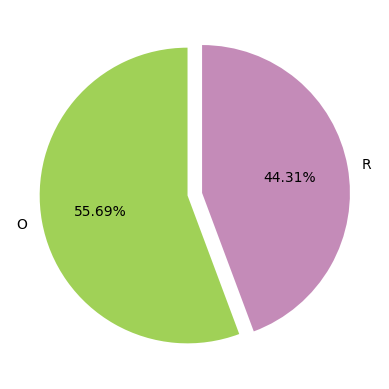

In [52]:
# Get unique labels and their counts
unique_labels = data['label'].unique()
label_counts = data['label'].value_counts()

# Manually create a dictionary for label mapping
label_mapping = {
    'O': 'organic',
    'R': 'recyclable'
}

# Map the labels for the pie chart
unique_labels_for_chart = [label_mapping.get(label, label) for label in unique_labels]


# Limit colors to the number of unique labels
colors = ["#a0d157", "#c48bb8"]  # Your original colors
num_colors_needed = len(unique_labels)
colors = colors[:num_colors_needed]  # Take only the needed colors

# Create the pie chart using the modified unique_labels
plt.pie(label_counts, labels=unique_labels, autopct='%0.2f%%',
         colors=colors, startangle=90, explode=[0.05] * len(unique_labels))

plt.show()
